# CONET results

Load results files: newick tree, cell assignment, copy number alterations in nodes and copy number profiles.


In [2]:
import itertools
import os

import pandas as pd
import numpy as np
import networkx as nx

In [3]:
data_path = "/Users/zemp/phd/scilife/cpt_experiments/SA501X3F/conet-out"
attachment_path = os.path.join(data_path, "best_attachment_final")
tree_newick_path = os.path.join(data_path, "best_tree_Newick")
tree_edges_path = os.path.join(data_path, "best_tree_final")

corr_counts_path = "/Users/zemp/phd/scilife/cpt_experiments/CONET/CONET/python/notebooks/biological_data/data/SA501X3F_filtered_corrected_counts.csv"
cn_calling_path = "/Users/zemp/phd/scilife/cpt_experiments/CONET/CONET/cn_calling_SA501X3F.csv"

In [4]:
tree_nx = nx.DiGraph()
node_map = {"(0,0)": 0}
# read tree and map clones
node_idx = 1
with open(tree_edges_path, 'r') as tree_edges_file:
    for l in tree_edges_file.readlines():
        # nodes u -> v
        u, v = l.strip().split('-')
        if u not in node_map:
            node_map[u] = node_idx
            tree_nx.add_node(node_idx, cna=u)
            node_idx += 1
        if v not in node_map:
            node_map[v] = node_idx
            tree_nx.add_node(node_idx, cna=v)
            node_idx += 1
        
        tree_nx.add_edge(node_map[u], node_map[v])
        # separate copy number alteration boundaries
        u_start, u_end = u.split(',')
        v_start, v_end = v.split(',')
print(tree_nx)

DiGraph with 226 nodes and 225 edges


In [5]:
nx.is_arborescence(tree_nx)

True

In [6]:
node_map

{'(0,0)': 0,
 '(1_750001,1_13950001)': 1,
 '(1_60150001,1_61350001)': 2,
 '(1_144900001,1_145500001)': 3,
 '(1_156000001,1_249250621)': 4,
 '(2_150001,2_25800001)': 5,
 '(2_50250001,2_53850001)': 6,
 '(2_53400001,2_59850001)': 7,
 '(2_59700001,2_63600001)': 8,
 '(2_91800001,2_95550001)': 9,
 '(2_159900001,2_177150001)': 10,
 '(2_195750001,2_201750001)': 11,
 '(3_13800001,3_16350001)': 12,
 '(3_34350001,3_86850001)': 13,
 '(3_87000001,3_89100001)': 14,
 '(3_114000001,3_180450001)': 15,
 '(3_141150001,3_153000001)': 16,
 '(3_152100001,3_198022430)': 17,
 '(4_150001,4_70500001)': 18,
 '(4_135300001,4_190500001)': 19,
 '(4_151650001,4_190650001)': 20,
 '(5_54150001,5_129150001)': 21,
 '(5_127050001,5_128850001)': 22,
 '(5_150450001,5_180915260)': 23,
 '(6_300001,6_32400001)': 24,
 '(6_55350001,6_57600001)': 25,
 '(6_90000001,6_114450001)': 26,
 '(6_126000001,6_144000001)': 27,
 '(6_136350001,6_144150001)': 28,
 '(6_157350001,6_171115067)': 29,
 '(7_73800001,7_74400001)': 30,
 '(7_138750001

In [7]:
# read newick
with open(tree_newick_path, 'r') as newick_file:
    newick_str = newick_file.readline()
    for cna, clone_id in node_map.items():
        newick_str = newick_str.replace(cna.replace(',', '__'), str(clone_id))
    print(newick_str)

(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((86)85)81,((((((93)91,92)90)89)88)87)82,(94,95)83,(((102,103,104)98,((107)105,106)99,((110)108,109)100,((112)111)101)96,97)84)80)78,(((((122)119,(123,124)120,(((((130)129)128)127)125,126)121)117,(131)118)114,(((((142)140,141)139)136,((148)143,(((((160,(((166)163,(167)164,(((171)170)168,(172)169)165)162)161)157,((((178,179)177)174,(((183,184)182)180,(185)181)175,176)173)158,159)152,153,((189)186,(190)187,188)154,155,156)150,151)149)144,((194)191,(((198)197)195,196)192,193)145,(((((205)204)202,203)200,201)199)146,147)137,138)132,133,(((((212)211)210)209)206,(213,214)207,((((220,221)219)217,218)215,216)208)134,135)115,116)113)79)77)76)75)74)73)72)71)69,((((225)224)223)222)70)68)67)66)65)64)63)62)61)60)59)58)57)56)55)54)53)52)51)50)49)48)47)46)45)44)43)42)41)40)39)38)37)36)35)34)33)32)31)30)29)28)27)26)25)24)23)22)21)20)19)18)17)16)15)14)13)12)11)10)9)8)7)6)5)4)3)2)1)0;


In [8]:
# read cell assignments
attachment_df = pd.read_csv(attachment_path, sep=';', names=["cell", "cna_start", "cna_end"])
attachment_df["cna"] = "(" + attachment_df["cna_start"] + "," + attachment_df["cna_end"] + ")"
attachment_df["clone_id"] = attachment_df["cna"].map(node_map)

c_cell_assignment = attachment_df['clone_id'].to_numpy()

attachment_df.head()

,cell,cna_start,cna_end,cna,clone_id
0,0,6_112950001,6_115200001,"(6_112950001,6_115200001)",123
1,1,6_91800001,6_137400001,"(6_91800001,6_137400001)",155
2,2,6_99750001,6_105000001,"(6_99750001,6_105000001)",162
3,3,18_22950001,18_26100001,"(18_22950001,18_26100001)",184
4,4,6_114000001,6_114150001,"(6_114000001,6_114150001)",207


In [9]:
# read cn matrix
bio_df = pd.read_csv(corr_counts_path)
cell_names = bio_df.filter(like='SA501X3F').columns
con_cn_df = pd.read_csv(cn_calling_path)
cn_matrix = con_cn_df[cell_names].to_numpy().T

# Read VICTree results

In [10]:
import anndata as ad
from io import StringIO
from utils.tree_utils import parse_newick
from sklearn.metrics import v_measure_score, adjusted_rand_score, f1_score

In [57]:
out_ad_path = "/Users/zemp/phd/scilife/cpt_experiments/SA501X3F/victree-out/K12/victree.out.h5ad"
# out_ad_path = "/Users/zemp/phd/scilife/cpt_experiments/SA501X3F/victree-out/K12_reboot/victree.out.h5ad"

In [58]:
out_ad = ad.read_h5ad(out_ad_path)
v_cell_assignment = out_ad.obs['victree-clone'].to_numpy()
v_newick_str = out_ad.uns['victree-tree-newick'][0].decode("UTF-8")
v_tree_nx = parse_newick(StringIO(v_newick_str))
v_cn_matrix = out_ad.layers['victree-cn-viterbi']

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [59]:
print(f"ELBO for victree result: {out_ad.uns['victree-elbo']}")

ELBO for victree result: -1600238.0


In [60]:
out_ad.uns['victree-tree-probs']

array([nan, nan], dtype=float32)

In [61]:
for i in range(out_ad.uns['victree-tree-newick'].size):
    print(f"tree {i}: {out_ad.uns['victree-tree-newick'][i]}")

tree 0: b'((((10)6,7,8)1,2,(9)3,4,11)5)0'
tree 1: b'(((2,(10)6,7,8)1,(9)3,4,11)5)0'


# Comparison


In [62]:
# cn mad
cn_mad = np.mean(np.abs(cn_matrix - v_cn_matrix))
cn_mad

0.0745214263040948

In [63]:
# ARI
ari = adjusted_rand_score(v_cell_assignment, c_cell_assignment)
ari

0.01834831184134963

In [64]:
# V-measure
vmeas = v_measure_score(v_cell_assignment, c_cell_assignment)
vmeas

0.42669804939021866

We introduce a custom score which measures distances between pairs of cells in terms of
path length from one cell to the other over conet tree relatively to victree tree.
Given tree "a" (conet) and tree "b" (victree), the score is computed as: 
`sum_ij ( (path_a(i, j) / max_path_a) - (path_b(i, j) / max_path_b) )`

The result is normalized by the max path in each tree. The lower the score,
the closer the assignments.

In [65]:
from utils.evaluation import tree_matching_score
tm_score, tm_score_mat = tree_matching_score(tree_nx, c_cell_assignment, v_tree_nx, v_cell_assignment, return_single_scores=True)
tm_score
# add correlation path distance and reads distance pairs of cells


0.12353212631849754

In [66]:
## homogeneity of conet clones wrt victree clones
## conet with many-more clones
from sklearn.metrics import homogeneity_score

homogeneity_score(v_cell_assignment, c_cell_assignment)

0.7211627886803501

### Plot trees

In [67]:
import matplotlib.pyplot as plt
from matplotlib import cm
from networkx.drawing.nx_agraph import graphviz_layout

color_list = cm.get_cmap("Set3").colors

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_22558/62779124.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_list = cm.get_cmap("Set3").colors


In [68]:
def max_agreement_conet_to_victree_nodes(conet_ca: np.ndarray, victree_ca: np.ndarray) -> list:
    clone_map = np.empty(max(conet_ca) + 1, dtype=np.int64)    
    for c_clone in range(clone_map.size):
        clone_cells = np.where(conet_ca == c_clone)[0]
        v_clones, counts = np.unique(victree_ca[clone_cells], return_counts=True)
        # pick the victree clone which is most representative of 
        # the cells in the conet clones
        # e.g. conet clone: 5 has cells: c1, c2, c3
        #   victree assigns cells c1 -> 2, c2 -> 2, c3 -> 1
        # then conet clone 5 will be mapped to victree clone 2
        if clone_cells.size > 0:
            clone_map[c_clone] = v_clones[np.argmax(counts)]
        else:
            clone_map[c_clone] = 0
    return clone_map

number of conet clones mapped to each victree clone. victree clone '0' contains allconet empty clones
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([112,  51,  23,  16,   7,   5,   3,   1,   2,   1,   4,   1]))


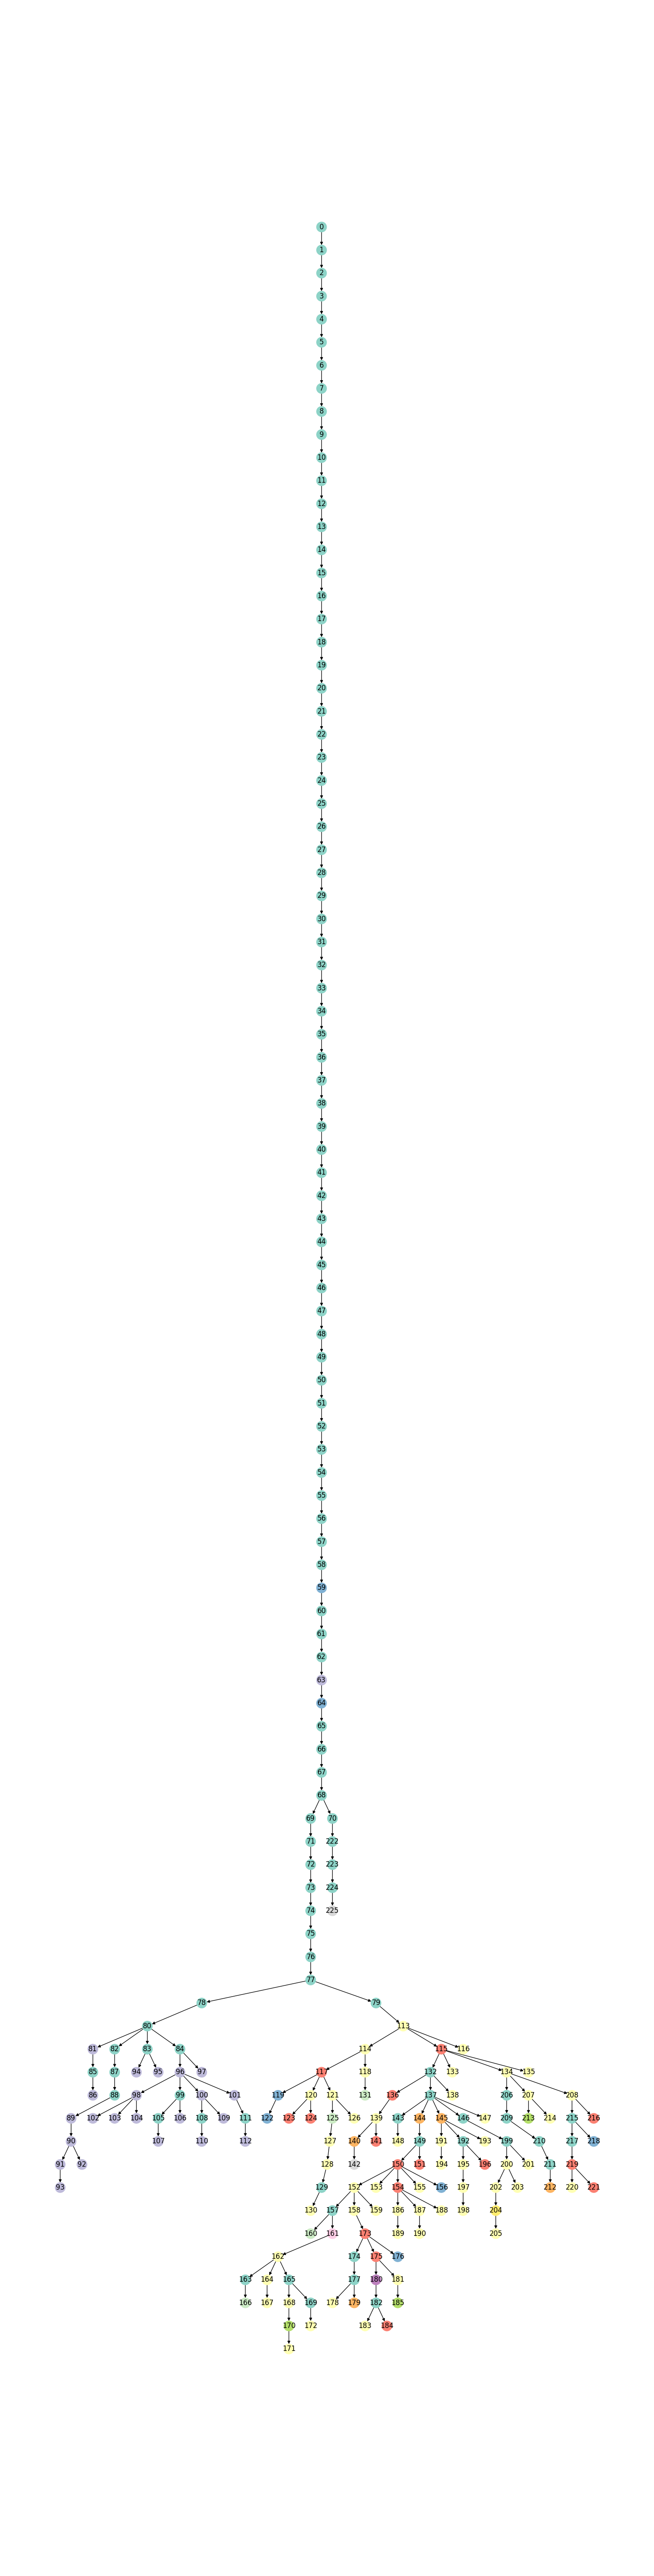

In [69]:
## Use node_match and draw conet tree with victree info
# conet tree
c_n_clones = max(c_cell_assignment + 1)
c_pos = graphviz_layout(tree_nx, prog='dot')
clone_counts = np.unique(c_cell_assignment, return_counts=True)

# make node_size_dict have all clones (even of size 0)
full_clone_counts = np.zeros(c_n_clones)
full_clone_counts[clone_counts[0]] = clone_counts[1]

# list of size tree_nx.number_of_nodes(), with map to v_tree_nx node ids
node_match = max_agreement_conet_to_victree_nodes(c_cell_assignment, v_cell_assignment)
print("number of conet clones mapped to each victree clone. victree clone '0' contains all" +
      "conet empty clones")
print(np.unique(node_match, return_counts=True))

node_size_dict = {i: a for i, a in enumerate(full_clone_counts)}
node_size = [node_size_dict[i] * 60 for i in tree_nx.nodes()]

fig, ax = plt.subplots(figsize=(20, 80), dpi=100)
nx.draw(tree_nx, node_color=[color_list[c] for c in node_match],
        with_labels=True, pos=c_pos,
        #node_size=node_size
        )
fig.savefig("conet_treeplot_equalsize.png")

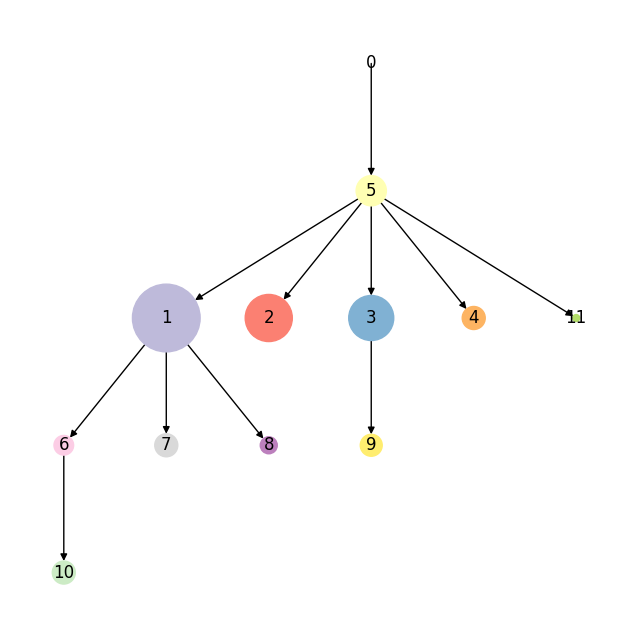

In [70]:
# victree tree
v_pos = graphviz_layout(v_tree_nx, prog='dot')
clone_counts = np.unique(v_cell_assignment, return_counts=True)
node_size_dict = {a[0]: a[1] for a in zip(*clone_counts)}
node_size_dict[0] = 0
node_size = [node_size_dict[i] * 25 for i in v_tree_nx.nodes()]
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
nx.draw(v_tree_nx, node_color=color_list,
        with_labels=True, pos=v_pos,
        node_size=node_size
        )
fig.savefig("victree_treeplot_sized.png")

## Distance correlation
Analysis of pairs of cells. Does the reads distance correlate with the distance in the tree?



In [79]:
from utils.evaluation import get_nodes_shortest_paths


def clone_distances(tree, assignment, normalized=True):
    # returns a list of size N choose 2 (all combinations of pairs of cells)
    # in the ordering defined by itertools.combinations(N, 2)
    N = assignment.size
    nodes_dist = get_nodes_shortest_paths(tree, normalized=normalized)
    dist = []
    for i, j in itertools.combinations(range(N), 2):
        dist.append(nodes_dist[assignment[i]][assignment[j]])
    return dist
    
def reads_distances(count_matrix, mean_dist=False):
    # returns a list of size N choose 2 (all combinations of pairs of cells)
    # in the ordering defined by itertools.combinations(N, 2)
    assert count_matrix.shape[0] < count_matrix.shape[1] # assumes cells are on the rows
    N = count_matrix.shape[0] 
    dist = []
    
    # avoid nans
    nan_mask = np.any(np.isnan(count_matrix), axis=0) 
    for i, j in itertools.combinations(range(N), 2):
        d = np.abs(count_matrix[i, ~nan_mask] - count_matrix[j, ~nan_mask])
        if mean_dist:
            d = np.mean(d)
        else:
            d = np.sum(d)
        dist.append(d)
    return dist

reads_dists = reads_distances(out_ad.X, mean_dist=False)
conet_clone_dists = clone_distances(tree_nx, c_cell_assignment)
victree_clone_dists = clone_distances(v_tree_nx, v_cell_assignment)

conet_corr = np.corrcoef(reads_dists, conet_clone_dists)
victree_corr = np.corrcoef(reads_dists, victree_clone_dists)
print(f"conet corr: {conet_corr}\nvictree corr: {victree_corr}")

conet corr: [[1.         0.49920204]
 [0.49920204 1.        ]]
victree corr: [[1.         0.22678751]
 [0.22678751 1.        ]]


reads distances correlate more with conet tree's path lengths, than victree's - 0.50 vs 0.23.

In [87]:
# avg distance from own clone

nan_mask = np.any(np.isnan(out_ad.X), axis=0) 
conet_sum_abs = np.sum(np.abs(out_ad.X - cn_matrix)[:,~nan_mask], axis=1)
victree_sum_abs = np.sum(np.abs(out_ad.X - v_cn_matrix[v_cell_assignment, :])[:, ~nan_mask], axis=1)
print(f"CONET sum(abs(reads - cn)) = {np.mean(conet_sum_abs)} +- {np.std(conet_sum_abs)}")
print(f"VICTree sum(abs(reads - cn)) = {np.mean(victree_sum_abs)} +- {np.std(victree_sum_abs)}")

CONET sum(abs(reads - cn)) = 4959.7397227757965 +- 706.6277672882845
VICTree sum(abs(reads - cn)) = 4820.432321762509 +- 958.9905944100514


In [72]:
from utils.evaluation import get_nodes_eps_dist

# with eps distances
eps_matrix = out_ad.uns['victree-eps-alpha'] / (out_ad.uns['victree-eps-alpha'] + out_ad.uns['victree-eps-beta'])
eps_dist = get_nodes_eps_dist(v_tree_nx, eps_matrix)
victree_corr_eps = np.corrcoef(reads_distances(out_ad.X), [eps_dist[v_cell_assignment[i], v_cell_assignment[j]] for i, j in itertools.combinations(range(v_cell_assignment.size), 2)])
print(f"with eps dist: {victree_corr_eps}")

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_22558/3406136189.py:4: RuntimeWarning: invalid value encountered in divide
  eps_matrix = out_ad.uns['victree-eps-alpha'] / (out_ad.uns['victree-eps-alpha'] + out_ad.uns['victree-eps-beta'])


with eps dist: [[ 1.         -0.09284435]
 [-0.09284435  1.        ]]


epsilon values as edge weights do not help, in fact they worsen the correlation.

In [73]:
print(f"avg cell reads distance overall: {np.mean(reads_dists)}")
## average cell reads distance for each clone

N = v_cell_assignment.size
reads_dist_dict = {(i, j): d for ((i, j), d) in zip(itertools.combinations(range(N), 2), reads_dists)}
nan_mask = np.any(np.isnan(out_ad.X), axis=0)
for v in range(v_tree_nx.number_of_nodes()):
    c_cells = np.where(v_cell_assignment == v)[0]
    mean_dist = 0
    if c_cells.size:
        cnt = 0
        for i, j in itertools.combinations(list(c_cells), 2):
            mean_dist += reads_dist_dict[i, j]
            cnt += 1
        mean_dist /= cnt if cnt > 0 else 1
        print(f"clone {v}, {c_cells.size} cells, avg cell reads dist: {mean_dist}")
    else:
        print(f"clone {v} EMPTY")


avg cell reads distance overall: 6661.31103515625
clone 0 EMPTY
clone 1, 95 cells, avg cell reads dist: 6060.029493171717
clone 2, 46 cells, avg cell reads dist: 6497.393948143116
clone 3, 42 cells, avg cell reads dist: 5921.736087670586
clone 4, 11 cells, avg cell reads dist: 6932.878480113636
clone 5, 19 cells, avg cell reads dist: 6385.7151492827115
clone 6, 8 cells, avg cell reads dist: 6717.619768415178
clone 7, 11 cells, avg cell reads dist: 7141.343057528409
clone 8, 6 cells, avg cell reads dist: 7031.80712890625
clone 9, 10 cells, avg cell reads dist: 5851.821158854166
clone 10, 11 cells, avg cell reads dist: 5923.934605823863
clone 11, 1 cells, avg cell reads dist: 0.0


In [74]:
conet_cell_clone_dist_dict = {(i, j): d for ((i, j), d) in zip(itertools.combinations(range(N), 2), conet_clone_dists)}
victree_cell_clone_dist_dict = {(i, j): d for ((i, j), d) in zip(itertools.combinations(range(N), 2), victree_clone_dists)}
for (i, j), d in dict(sorted(reads_dist_dict.items(), key=lambda a: a[1])).items():
    print(f"d {d}: {i}({v_cell_assignment[i]})-{j}({v_cell_assignment[j]}) -"
          f" dCONET: {conet_cell_clone_dist_dict[i, j]}"
          f" dVICTREE: {victree_cell_clone_dist_dict[i, j]}")


d 4313.87646484375: 27(3)-185(1) - dCONET: 0.043478260869565216 dVICTREE: 0.4
d 4325.83642578125: 13(3)-185(1) - dCONET: 0.03260869565217391 dVICTREE: 0.4
d 4336.33154296875: 50(10)-149(10) - dCONET: 0.08695652173913043 dVICTREE: 0.0
d 4341.73779296875: 13(3)-127(3) - dCONET: 0.07608695652173914 dVICTREE: 0.0
d 4351.1083984375: 149(10)-185(1) - dCONET: 0.043478260869565216 dVICTREE: 0.4
d 4362.5673828125: 50(10)-185(1) - dCONET: 0.06521739130434782 dVICTREE: 0.4
d 4364.71875: 27(3)-149(10) - dCONET: 0.0 dVICTREE: 0.8
d 4377.72802734375: 13(3)-27(3) - dCONET: 0.05434782608695652 dVICTREE: 0.0
d 4380.48779296875: 68(9)-185(1) - dCONET: 0.08695652173913043 dVICTREE: 0.6
d 4386.1865234375: 127(3)-185(1) - dCONET: 0.043478260869565216 dVICTREE: 0.4
d 4401.3466796875: 27(3)-50(10) - dCONET: 0.08695652173913043 dVICTREE: 0.8
d 4415.10693359375: 13(3)-68(9) - dCONET: 0.07608695652173914 dVICTREE: 0.2
d 4426.751953125: 68(9)-127(3) - dCONET: 0.13043478260869565 dVICTREE: 0.2
d 4431.548828125: 2

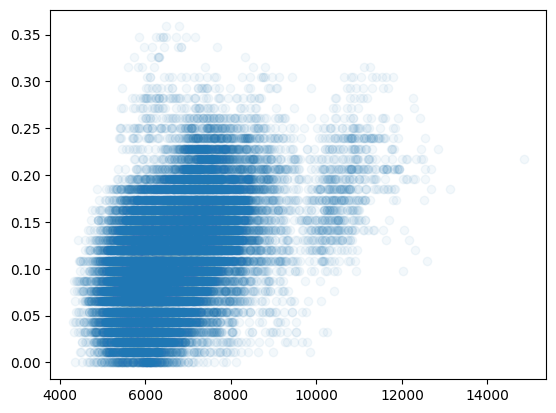

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(reads_dists, conet_clone_dists, alpha=.05)
plt.show()

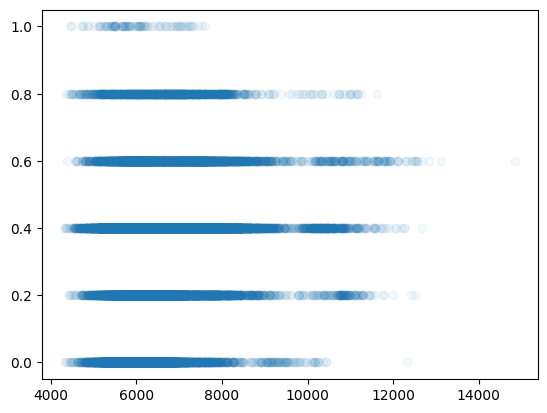

In [76]:
plt.scatter(reads_dists, victree_clone_dists, alpha=.05)
plt.show()